In [6]:
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Problem 1

In [7]:
x = 3 # Average cosmic-ray background
y = 6 # Average number of gamma-rays emitted by the hypothetical source

## A) Show how the probability distribution changes

In [19]:
def graph (start, stop, data,scale,divisor,mu, convolutions, xmax = None,xmin = None, average = False):
    if average:
        xmax = stop / convolutions
    elif (xmax == None):
        xmax = stop
    if (xmin != None):
        start = xmin
    # Graphs the initiall distribution
    fig, ax = plt.subplots(1,1)
    plt.step(x=np.linspace(start,xmax,xmax-start), y = data[start:xmax], where = 'mid')
    x = np.linspace(start, xmax, 10000)
    ax.plot(x,scipy.stats.norm.pdf(x,scale = scale, loc = mu * (convolutions+1))/divisor,linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution

    plt.xlabel("Signal measured")
    plt.ylabel("Probability of occuring")
    plt.title("Distribution")
    plt.show()

    fig, ax = plt.subplots(1,1)
    plt.step(x=np.linspace(start,xmax,xmax-start), y = data[start:xmax], where = 'mid')
    x = np.linspace(start,xmax,10000)
    ax.plot(x,scipy.stats.norm.pdf(x,scale = scale, loc = mu * (convolutions+1))/divisor,linewidth = 3,alpha = 0.7) # 6.1 fits the curve to the distribution

    plt.xlabel("Signal measured")
    plt.ylabel("Probability of occuring")
    plt.title("Semilog distribution")
    plt.semilogy()
    plt.show()


In [20]:
base_poisson = [-1]*25
for i in range(25):
    base_poisson[i] = scipy.stats.poisson.pmf(i, 3)

In [21]:
convolved_bins = base_poisson
for i in range(5):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

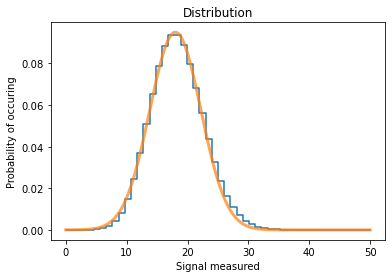

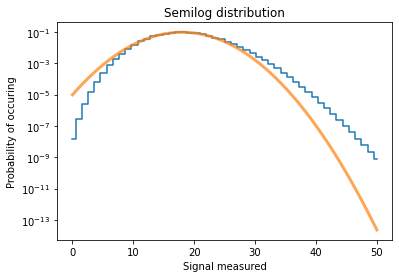

In [22]:
graph(0,len(convolved_bins), convolved_bins,4.2,1,x, 5,xmax = 50)

For 5 convolutions, we start to see that the graph begins to take a general shape of a gaussian. However, as we get towards the tails, we can see that the distribution begins to pull away from a gaussian on the semilog graph

In [23]:
convolved_bins = base_poisson
for i in range(20):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

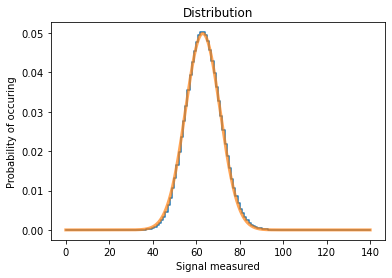

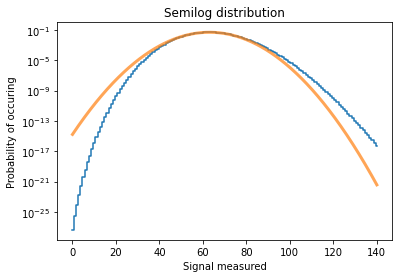

In [24]:
graph(0,len(convolved_bins), convolved_bins,8,1,x,20, xmax = 140)

Here we can see the poisson start to look more and more like a gaussian curve, particularly in the semilog-y chart and the smoothness

In [25]:
convolved_bins = base_poisson
for i in range(200):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

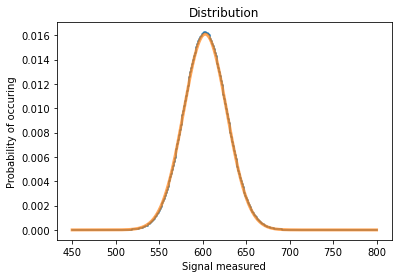

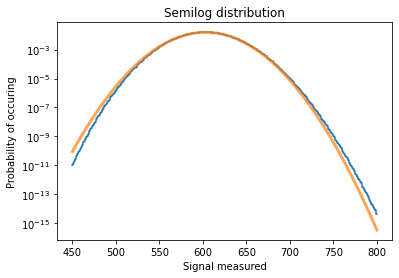

In [26]:
graph(0,len(convolved_bins), convolved_bins,24.8,1,x,200, xmax = 800, xmin = 450)

At 200 convolution we begin to see that the data resembles a gaussian much more closely, which is evident from the semilog-y plot. Here we can see that even towards the tails the data resembles a gaussian fairly closely, which is to be expected, as all distributions, including gaussians convolve into gaussians.

## B) After 5 days the summed probability distribution is still Poisson

In [27]:
convolved_bins = base_poisson
for i in range(5):
    convolved_bins = np.convolve(convolved_bins, base_poisson)

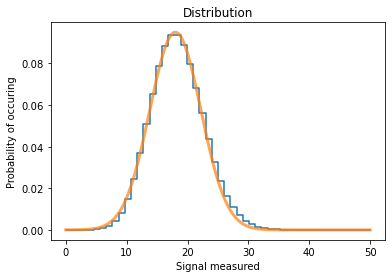

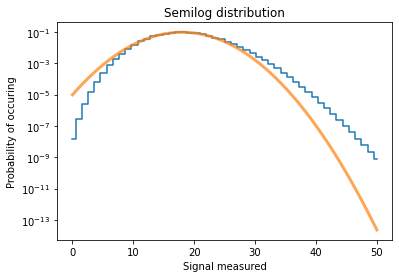

In [28]:
graph(0,len(convolved_bins), convolved_bins,4.2,1,x, 5,xmax = 50)

While the standard plot can lead one to believe that the distribution is gaussian, we can see from the semilog-y plot the telltale signs of a Poisson distribution. this is shown in the sharp rise from the left towards the mean, with a more gradual falloff as the signal meassured goes to the right, as opposed to the parabolic nature of the gaussian curve.